In [110]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [111]:
start = '2014-01-01'
end = '2024-05-15'
stock = 'AMZN'

df= yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [112]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,19.940001,19.9680,19.701000,19.898500,19.898500,42756000
2014-01-03,19.914499,20.1355,19.811001,19.822001,19.822001,44204000
2014-01-06,19.792500,19.8500,19.421000,19.681499,19.681499,63412000
2014-01-07,19.752001,19.9235,19.714500,19.901501,19.901501,38320000
2014-01-08,19.923500,20.1500,19.802000,20.096001,20.096001,46330000


In [113]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-08,187.440002,188.429993,186.389999,188.000000,188.000000,26136400
2024-05-09,188.880005,191.699997,187.440002,189.500000,189.500000,43368400
2024-05-10,189.160004,189.889999,186.929993,187.479996,187.479996,34141800
2024-05-13,188.000000,188.309998,185.360001,186.570007,186.570007,24898600
2024-05-14,183.820007,187.720001,183.449997,187.070007,187.070007,38698200


In [114]:
df=df.reset_index()
df=df.drop(['Adj Close'], axis=1)
df.head()


,Date,Open,High,Low,Close,Volume
0,2014-01-02,19.940001,19.9680,19.701000,19.898500,42756000
1,2014-01-03,19.914499,20.1355,19.811001,19.822001,44204000
2,2014-01-06,19.792500,19.8500,19.421000,19.681499,63412000
3,2014-01-07,19.752001,19.9235,19.714500,19.901501,38320000
4,2014-01-08,19.923500,20.1500,19.802000,20.096001,46330000


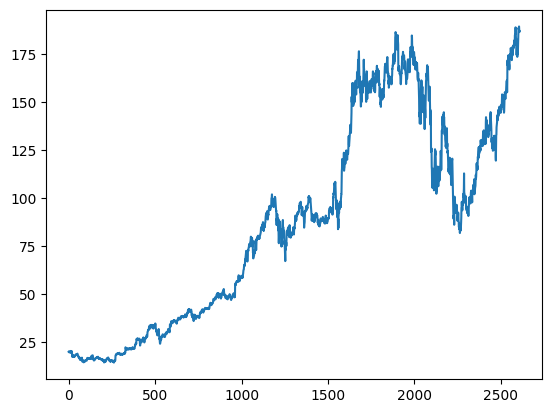

In [115]:
plt.plot(df.Close)

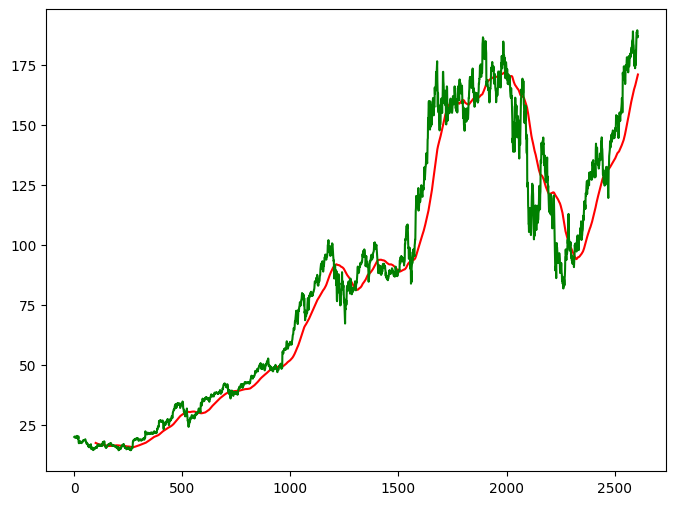

In [116]:
ma_100_days = df.Close.rolling(100).mean()
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(df.Close, 'g')
plt.show()


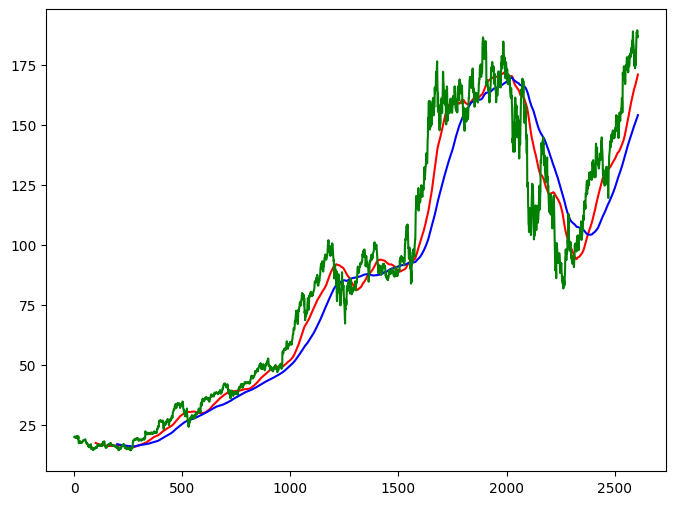

In [117]:
ma_200_days = df.Close.rolling(200).mean()
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(df.Close,'g')
plt.show()

In [118]:
print("Total data:",df.shape)

Total data: (2609, 6)


In [119]:
#Split the data into training and testing part
data_train = pd.DataFrame(df.Close[0: int(len(df)*0.70)])
data_test = pd.DataFrame(df.Close[int(len(df)*0.70): len(df)])
print("Training data:",data_train.shape)
print("Test data:",data_test.shape)

Training data: (1826, 1)
Test data: (783, 1)


In [120]:
#Scale Down the data between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_train_array = scaler.fit_transform(data_train)
data_train_array

array([[0.03421791],
       [0.03374635],
       [0.03288026],
       ...,
       [0.86519648],
       [0.88582221],
       [0.9060811 ]])

In [121]:
print(data_train_array.shape)

(1826, 1)


In [122]:
x_train = []
y_train = []

for i in range(100, data_train_array.shape[0]):
    x_train.append(data_train_array[i-100:i])
    y_train.append(data_train_array[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train.shape)
print(y_train.shape)

(1726, 100, 1)
(1726,)


In [123]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [124]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x_train.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [125]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [126]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train,y_train, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
54/54 [==============================] - 13s 174ms/step - loss: 0.0308
Epoch 2/50
54/54 [==============================] - 10s 183ms/step - loss: 0.0071
Epoch 3/50
54/54 [==============================] - 10s 180ms/step - loss: 0.0059
Epoch 4/50
54/54 [==============================] - 8s 153ms/step - loss: 0.0055
Epoch 5/50
54/54 [==============================] - 10s 190ms/step - loss: 0.0051
Epoch 6/50
54/54 [==============================] - 9s 173ms/step - loss: 0.0047
Epoch 7/50
54/54 [==============================] - 9s 173ms/step - loss: 0.0049
Epoch 8/50
54/54 [==============================] - 8s 154ms/step - loss: 0.0043
Epoch 9/50
54/54 [==============================] - 9s 173ms/step - loss: 0.0040
Epoch 10/50
54/54 [==============================] - 9s 173ms/step - loss: 0.0041
Epoch 11/50
54/54 [==============================] - 9s 162ms/step - loss: 0.0039
Epoch 12/50
54/54 [==============================] - 10s 183ms/step - loss: 0.0039
Epoch 13/50
54/54 [=

In [127]:
last_100_days = data_train.tail(100)

In [128]:
data_test = pd.concat([last_100_days, data_test], ignore_index=True)
data_test.head()

,Close
0,157.186996
1,151.751007
2,156.869507
3,155.514008
4,156.440506


In [129]:
data_test_scale  =  scaler.fit_transform(data_test)

In [130]:
data_test_scale.shape

(883, 1)

In [131]:
x_test= []
y_test = []

for i in range(100, data_test_scale.shape[0]):
    x_test.append(data_test_scale[i-100:i])
    y_test.append(data_test_scale[i,0])
x_test, y_test = np.array(x_test), np.array(y_test)

print(x_test.shape)
print(y_test.shape)

(783, 100, 1)
(783,)


In [132]:
#Making Prediction
y_predict = model.predict(x_test)

25/25 [==============================] - 2s 46ms/step


In [133]:
y_predict.shape

(783, 1)

In [139]:
scaler.scale_

array([0.00928678])

In [140]:
scale_factor=1/0.00928678
y_predict = y_predict * scale_factor
y_test=y_test*scale_factor

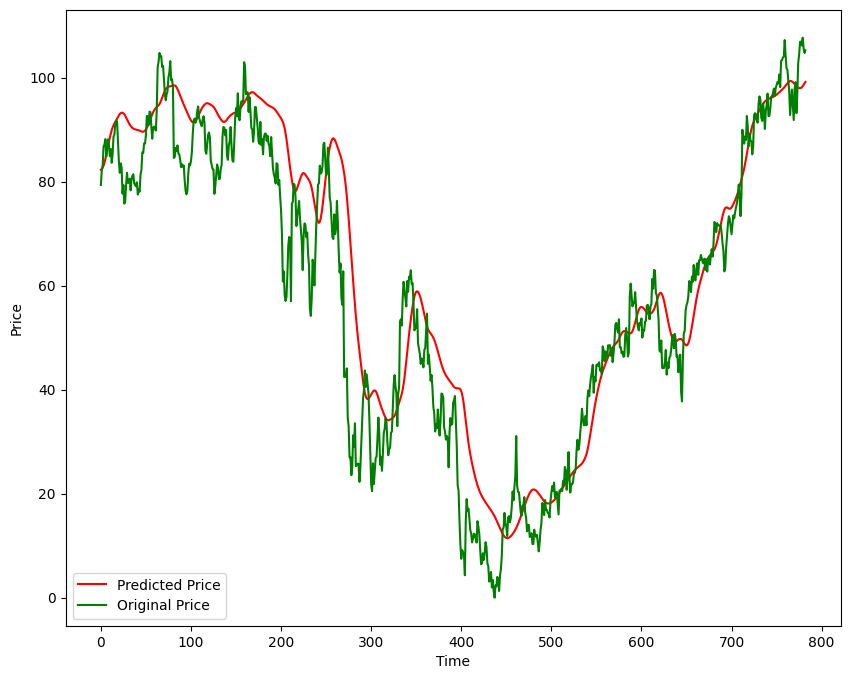

In [141]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y_test, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [134]:
model.save("stock_price_prediction.keras")